In [1]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(clusterProfiler)
    library(enrichplot)
library(ggplot2)
    library(scCustomize)
})

In [15]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [2]:
artem.obj = readRDS(
    glue::glue(
        '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/data/3_sample_bam/',
        'seurat_objs/adrenal.mouse.seurat.rds'
    )
)

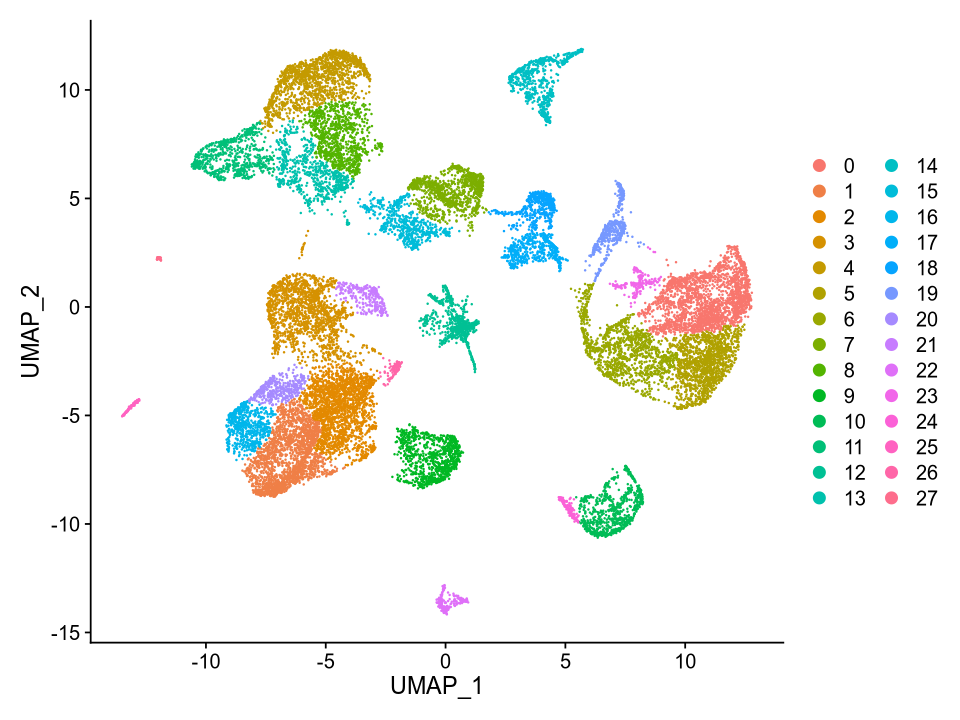

In [3]:
options(repr.plot.height=6, repr.plot.width=8, res=150 ) 
DimPlot(artem.obj, reduction = "umap")

In [4]:
artem.obj = UpdateSeuratObject(artem.obj)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for NormalizeData.RNA to RNA

Setting assay used for FindVariableFeatures.RNA to RNA

Setting assay used for ScaleData.RNA to RNA

Setting assay used for RunPCA.RNA to RNA

Setting assay used for JackStraw.RNA.pca to RNA

No assay information could be found for ScoreJackStr

In [5]:
selected_cells =
    artem.obj@meta.data %>% dplyr::filter((!!sym('RNA_snn_res.0.3')) %in% c(17, 18)) %>% 
    rownames

In [6]:
artem.obj

An object of class Seurat 
19330 features across 22715 samples within 1 assay 
Active assay: RNA (19330 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [7]:
selected_cells %>% length

[1] 1051

In [8]:
artem.obj.tumor = artem.obj[,selected_cells]

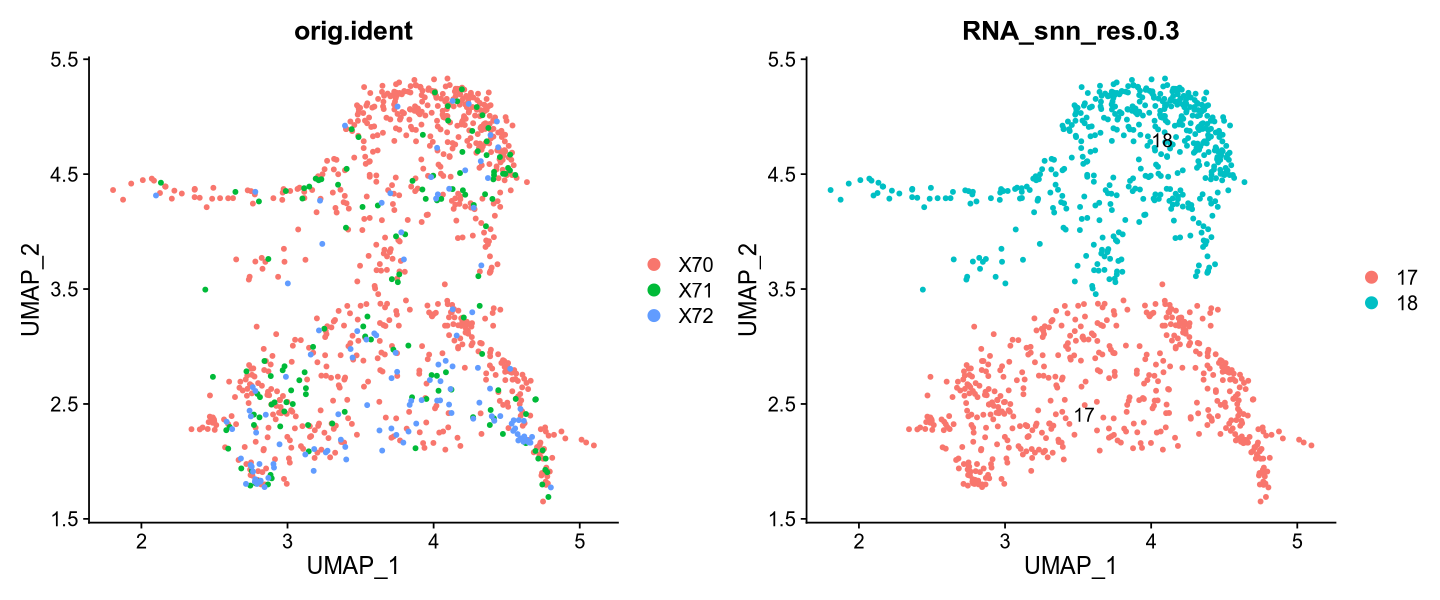

In [9]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(artem.obj.tumor, reduction = "umap",group.by='orig.ident') 
p2 <- DimPlot(artem.obj.tumor, 
              group.by = 'RNA_snn_res.0.3',
              reduction = "umap", label = TRUE, repel = TRUE)
p3 = p1 + p2
p3

In [10]:
custom.annot = c('Sympathoblasts', 'Chromaffin Cells')
names(custom.annot) = c('17','18')

In [11]:
artem.obj.tumor@meta.data$annot = custom.annot[ 
    artem.obj.tumor@meta.data$seurat_clusters %>% as.vector ]

In [55]:
artem.obj.tumor

An object of class Seurat 
19330 features across 1051 samples within 1 assay 
Active assay: RNA (19330 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

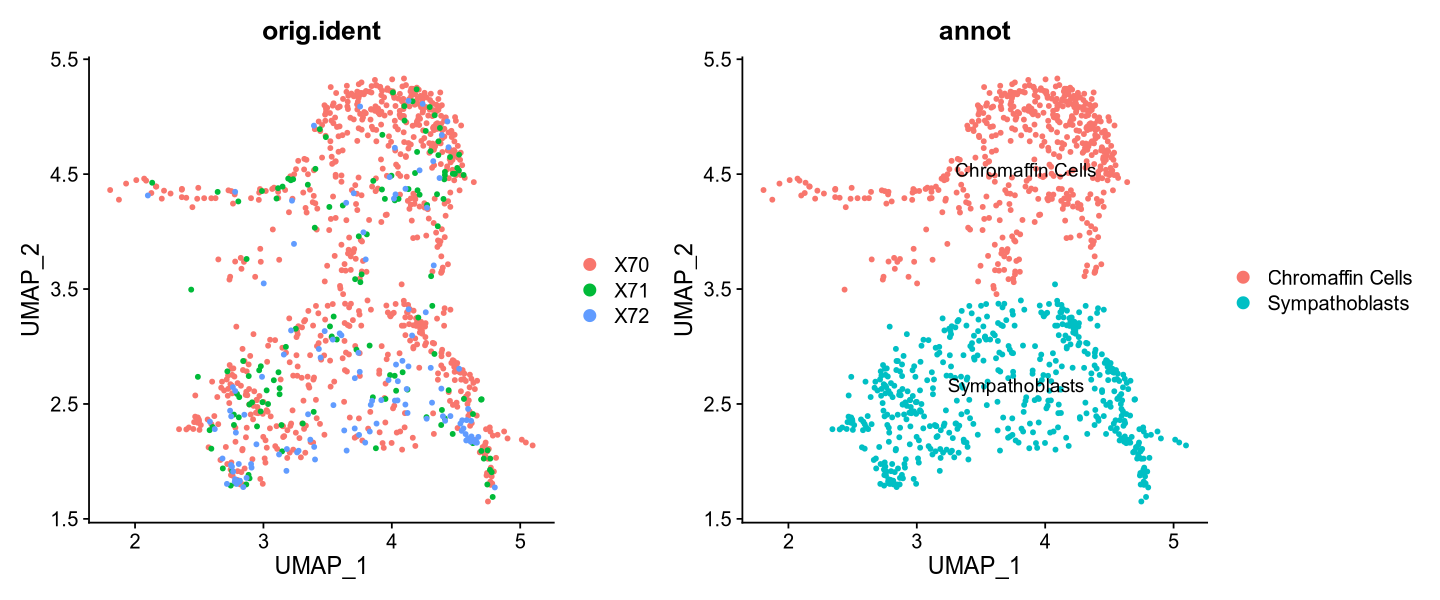

In [12]:
p1 <- DimPlot(artem.obj.tumor, reduction = "umap",group.by='orig.ident') 
p2 <- DimPlot(artem.obj.tumor, 
              group.by = 'annot',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [13]:
homo = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_homo.rds'
        )
)
hemi = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_hemi.rds'
        )
)

In [18]:
all_cell_types = union(
   unique(homo$annot),
   unique(hemi$annot)
)

In [19]:
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)
#color.list = hue_pal()(15)
names(color.list) = all_cell_types

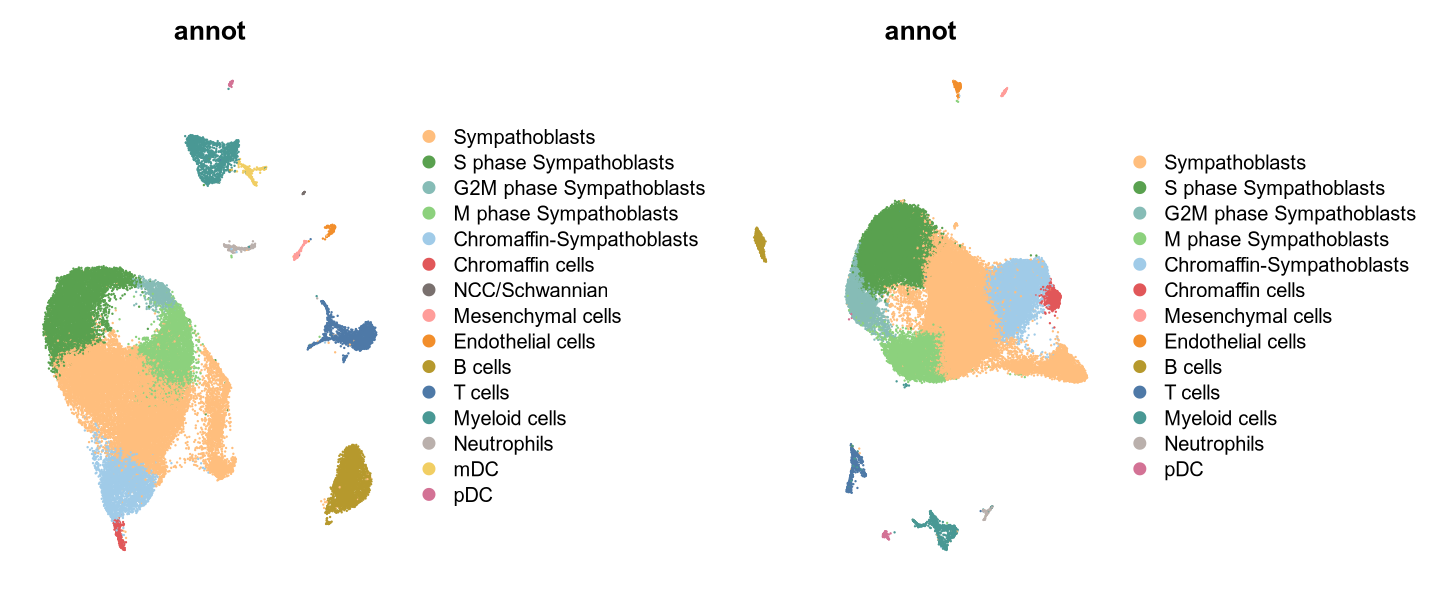

In [20]:
fig.size(5,12)

p.homo = DimPlot(homo, label=F, reduction="umap", group.by="annot")+scale_color_manual(values = color.list) + NoAxes()
p.hemi = DimPlot(hemi, label=F, reduction="umap", group.by="annot")+scale_color_manual(values = color.list) + NoAxes()
combined_plots = p.homo | p.hemi
combined_plots

In [21]:
all_cell_types

[1] "T cells"                   "Chromaffin-Sympathoblasts"
 [3] "Endothelial cells"         "Sympathoblasts"           
 [5] "S phase Sympathoblasts"    "M phase Sympathoblasts"   
 [7] "B cells"                   "mDC"                      
 [9] "Myeloid cells"             "G2M phase Sympathoblasts" 
[11] "Chromaffin cells"          "Mesenchymal cells"        
[13] "NCC/Schwannian"            "Neutrophils"              
[15] "pDC"

In [64]:
tumor = c(
    'Chromaffin-Sympathoblasts','Sympathoblasts','S phase Sympathoblasts',
    'M phase Sympathoblasts','G2M phase Sympathoblasts','Chromaffin cells'
)

In [65]:
hemi.tumor = subset(hemi, subset = annot %in% tumor)

In [66]:
homo.tumor = subset(homo, subset = annot %in% tumor)

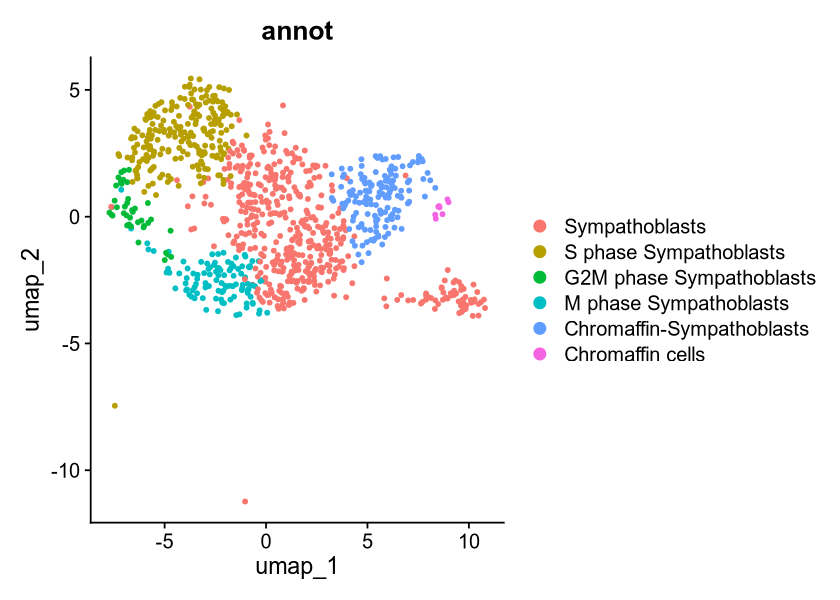

In [77]:
options(repr.plot.height=5, repr.plot.width=7, res=150 ) 
cell.names =  sample(hemi.tumor@meta.data %>% rownames,
       1000)
hemi.tumor.sample = hemi.tumor[,cell.names]
DimPlot(hemi.tumor.sample, reduction = "umap",group.by='annot')

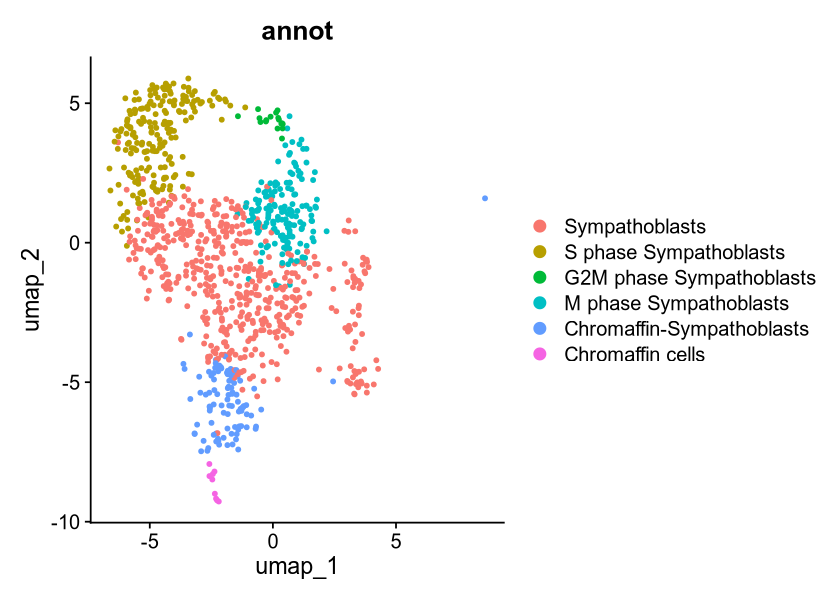

In [78]:
options(repr.plot.height=5, repr.plot.width=7, res=150 ) 
cell.names =  sample(homo.tumor@meta.data %>% rownames,
       1000)
homo.tumor.sample = homo.tumor[,cell.names]
DimPlot(homo.tumor.sample, reduction = "umap",group.by='annot')

In [79]:
'MYCN' %in% rownames(hemi.tumor.sample)

[1] TRUE

In [80]:
hemi.removed = hemi.tumor.sample[setdiff(rownames(hemi.tumor.sample), 'MYCN'),]
homo.removed = homo.tumor.sample[setdiff(rownames(homo.tumor.sample), 'MYCN'),]

In [125]:
artem.list = SplitObject(artem.obj.tumor,split.by = "orig.ident")
homo.list =  SplitObject(homo.removed, split.by = "orig.ident")
hemi.list =  SplitObject(hemi.removed, split.by = "orig.ident")

In [126]:
lapply(homo.list, dim)

$homo1
[1] 31410   180

$homo2
[1] 31410    81

$homo3
[1] 31410   292

$no_6_PT
[1] 31410   268

$no_50_PT
[1] 31410   179

In [127]:
combined.list = c(artem.list, homo.list, hemi.list)

In [128]:
#combined.list = c(artem.obj.tumor, homo.removed, hemi.removed)

In [129]:
features = SelectIntegrationFeatures(
    combined.list
)
s.obj.scaled = lapply(
    X = combined.list,
    FUN = function(x){
        x = ScaleData(x, features = features, verbose = FALSE)
        x = RunPCA(x, features = features, verbose = FALSE)
    }
)

anchors = FindIntegrationAnchors(
    object.list = s.obj.scaled,
    dims = 1:30,
    
)

combined = IntegrateData(
    anchorset = anchors,
    dims = 1:30
)

No variable features found for object4 in the object.list. Running FindVariableFeatures ...

No variable features found for object5 in the object.list. Running FindVariableFeatures ...

No variable features found for object6 in the object.list. Running FindVariableFeatures ...

No variable features found for object7 in the object.list. Running FindVariableFeatures ...

No variable features found for object8 in the object.list. Running FindVariableFeatures ...

Warning message:
“Number of dimensions changing from 30 to 50”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Different features in new layer data than alr

ERROR: Error in FindWeights(object = merged.obj, integration.name = integration.name, : Number of anchor cells is less than k.weight. Consider lowering k.weight to less than 81 or increase k.anchor.


In [132]:
?IntegrateData

IntegrateData {Seurat},R Documentation
anchorset,An AnchorSet object generated by FindIntegrationAnchors
new.assay.name,Name for the new assay containing the integrated data
normalization.method,Name of normalization method used: LogNormalize or SCT
features,Vector of features to use when computing the PCA to determine the weights. Only set if you want a different set from those used in the anchor finding process
features.to.integrate,"Vector of features to integrate. By default, will use the features used in anchor finding."
dims,Number of dimensions to use in the anchor weighting procedure
k.weight,Number of neighbors to consider when weighting anchors
weight.reduction,"Dimension reduction to use when calculating anchor weights. This can be one of: A string, specifying the name of a dimension reduction present in all objects to be integrated A vector of strings, specifying the name of a dimension reduction to use for each object to be integrated A vector of DimReduc objects, specifying the object to use for each object in the integration NULL, in which case a new PCA will be calculated and used to calculate anchor weights Note that, if specified, the requested dimension reduction will only be used for calculating anchor weights in the first merge between reference and query, as the merged object will subsequently contain more cells than was in query, and weights will need to be calculated for all cells in the object."
sd.weight,Controls the bandwidth of the Gaussian kernel for weighting
sample.tree,"Specify the order of integration. Order of integration should be encoded in a matrix, where each row represents one of the pairwise integration steps. Negative numbers specify a dataset, positive numbers specify the integration results from a given row (the format of the merge matrix included in the hclust function output). For example: matrix(c(-2, 1, -3, -1), ncol = 2) gives: [,1] [,2] [1,] -2 -3 [2,] 1 -1 Which would cause dataset 2 and 3 to be integrated first, then the resulting object integrated with dataset 1. If NULL, the sample tree will be computed automatically."


In [133]:
combined = IntegrateData(
    anchorset = anchors,
    dims = 1:30,
    k.weight = 50
)

Merging dataset 3 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 5 into 6

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 10 into 9

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 7

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 12 into 1 3

Extracting anchors for merged samples

Finding integration vectors

Warning message:
“Different cells in new layer data than already exists for scale.data”
Finding integration vector weights

Integrating data

Merging dataset 8 into 6 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 

In [134]:
combined

An object of class Seurat 
34154 features across 3051 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 layer present: data
 1 other assay present: RNA

In [135]:
combined <- ScaleData(combined, verbose = FALSE)
combined <- RunPCA(combined, npcs = 30, verbose = FALSE)
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)
combined <- FindNeighbors(combined, reduction = "pca", dims = 1:30)
combined <- FindClusters(combined, resolution = 0.5)

16:17:45 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

16:17:45 Read 3051 rows and found 30 numeric columns

16:17:45 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

16:17:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:17:46 Writing NN index file to temp file /tmp/RtmpAzxd7N/file3defb416c463f

16:17:46 Searching Annoy index using 1 thread, search_k = 3000

16:17:46 Annoy recall = 100%

16:17:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:17:48 Initializing from normalized Laplacian + 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3051
Number of edges: 156232

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8211
Number of communities: 9
Elapsed time: 0 seconds


In [136]:
saveRDS(
    combined,
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/artem_homo_hemi2.rds'
        )
)

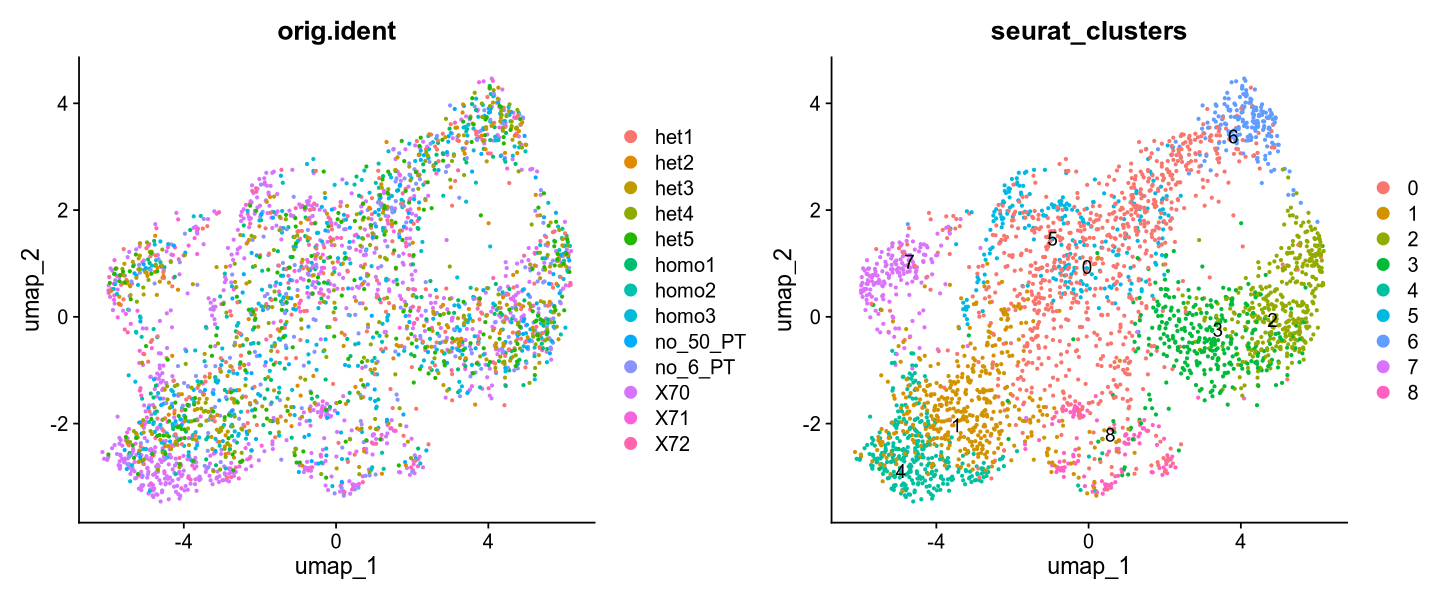

In [137]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(combined, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(combined, 
              group.by = 'seurat_clusters',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [138]:
mito.genes = grep(pattern = "^mt-", x = rownames(combined@assays$RNA), 
                  value = TRUE, ignore.case = TRUE)
rpl.genes = grep(pattern = "^rpl", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
rps.genes = grep(pattern = "^rps", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
genes.removed = union(mito.genes, rpl.genes)
genes.removed = union(genes.removed, rps.genes) 
combined.remove = combined[setdiff(rownames(combined@assays$RNA), genes.removed),]

In [139]:
combined.remove$sample.type = combined.remove$orig.ident
combined.remove$sample.type[grep('X', combined.remove$orig.ident)] = 'adrenal'
combined.remove$sample.type[!grepl('X', combined.remove$orig.ident)] = 'neuroblastoma'
combined.remove$sample.type = as.factor(combined.remove$sample.type)

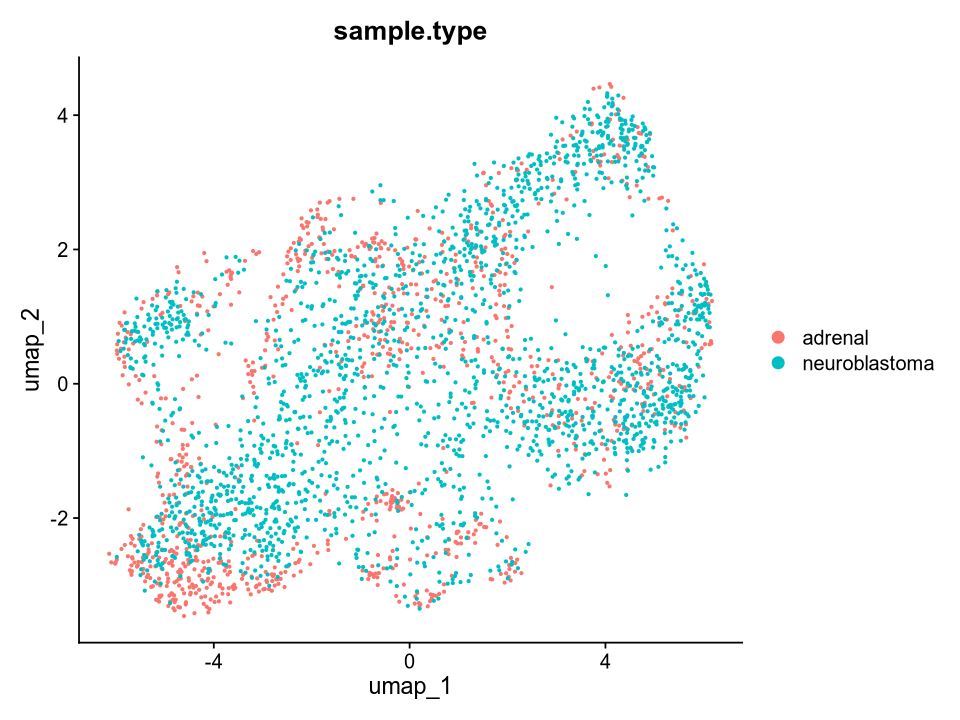

In [140]:
options(repr.plot.height=6, repr.plot.width=8, res=150 ) 
DimPlot(combined.remove, reduction = "umap",group.by='sample.type')

In [141]:
Idents(combined.remove) = "sample.type"

In [142]:
#DefaultAssay(combined.remove) = "RNA"

In [143]:
combined.remove = JoinLayers(combined.remove)

ERROR: Error in UseMethod(generic = "JoinLayers", object = object): no applicable method for 'JoinLayers' applied to an object of class "c('Assay', 'KeyMixin')"


In [144]:
markers = FindAllMarkers(combined.remove, only.pos = T)

Calculating cluster adrenal

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”
Calculating cluster neuroblastoma

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
“NaNs produced”
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
“NaNs produced”


In [145]:
markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Fgf7,0,4.948738,0.047,0.309,0,adrenal,Fgf7
Chil1,0,3.360369,0.027,0.198,0,adrenal,Chil1
5330416C01Rik,0,3.030339,0.070,0.416,0,adrenal,5330416C01Rik
Prob1,0,2.490954,0.092,0.512,0,adrenal,Prob1
Hfe2,0,2.299218,0.040,0.200,0,adrenal,Hfe2
Rbm47,0,2.200492,0.105,0.619,0,adrenal,Rbm47
Gimap5,0,2.187076,0.022,0.211,0,adrenal,Gimap5
Ndst4,0,2.140731,0.057,0.448,0,adrenal,Ndst4
Ccer2,0,1.545028,0.061,0.372,0,adrenal,Ccer2


In [150]:
markers %>%
    group_by(cluster) %>%
    top_n(n = 40, wt = avg_log2FC) -> top20

In [151]:
 top20

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,4.948738,0.047,0.309,0.000000e+00,adrenal,Fgf7
0.000000e+00,3.360369,0.027,0.198,0.000000e+00,adrenal,Chil1
0.000000e+00,3.030339,0.070,0.416,0.000000e+00,adrenal,5330416C01Rik
0.000000e+00,2.490954,0.092,0.512,0.000000e+00,adrenal,Prob1
0.000000e+00,2.299218,0.040,0.200,0.000000e+00,adrenal,Hfe2
0.000000e+00,2.200492,0.105,0.619,0.000000e+00,adrenal,Rbm47
0.000000e+00,2.187076,0.022,0.211,0.000000e+00,adrenal,Gimap5
0.000000e+00,2.140731,0.057,0.448,0.000000e+00,adrenal,Ndst4
0.000000e+00,1.545028,0.061,0.372,0.000000e+00,adrenal,Ccer2


In [155]:
DefaultAssay(combined.remove) = "integrated"

In [156]:
combined.remove

An object of class Seurat 
34021 features across 3051 samples within 2 assays 
Active assay: integrated (1996 features, 1996 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

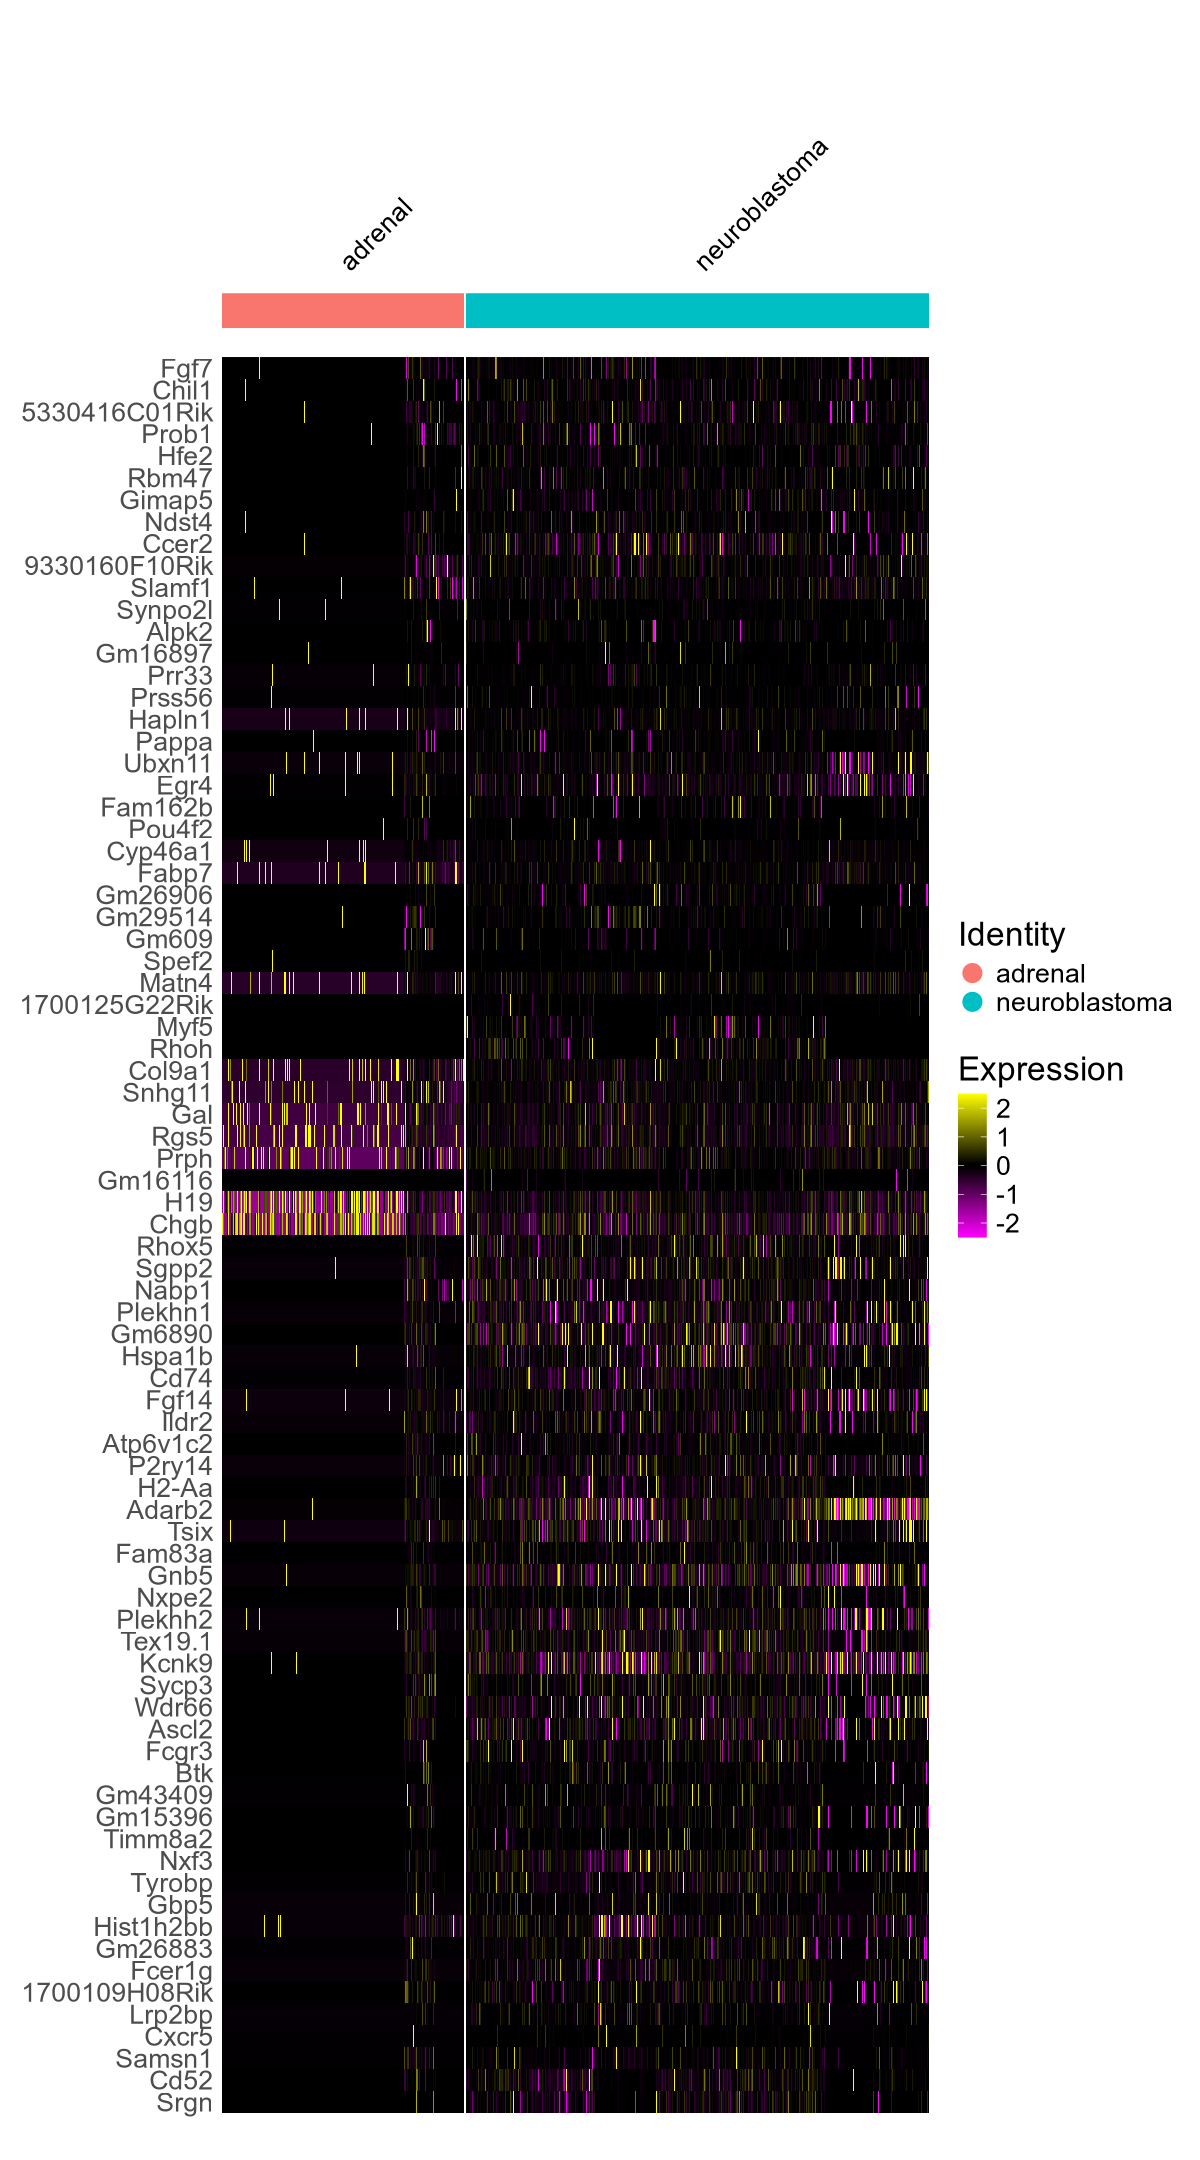

In [157]:
options(repr.plot.height=18, repr.plot.width=10, res=150 ) 
p1 = DoHeatmap(combined.remove, slot = "scale.data", features = top20$gene) +  
guides(colour = guide_legend(override.aes = list(alpha = 1, size = 5))) +
theme(text = element_text(size = 20))
p1 

In [115]:
ggsave(plot = p1, 
       filename = '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/results/figures/2024/Figure_2/Figure_2D.pdf',
       height = 18, 
       width = 10,
       dpi = 300
      )

In [113]:
?DoHeatmap

DoHeatmap {Seurat},R Documentation
object,Seurat object
features,"A vector of features to plot, defaults to VariableFeatures(object = object)"
cells,A vector of cells to plot
group.by,A vector of variables to group cells by; pass 'ident' to group by cell identity classes
group.bar,Add a color bar showing group status for cells
group.colors,Colors to use for the color bar
disp.min,Minimum display value (all values below are clipped)
disp.max,"Maximum display value (all values above are clipped); defaults to 2.5 if slot is 'scale.data', 6 otherwise"
slot,"Data slot to use, choose from 'raw.data', 'data', or 'scale.data'"
assay,Assay to pull from
